# Introduction to RNNs

In this notebook, you will learn:

1. What is an RNN?
2. Architecture of a basic RNN, LSTM and GRU
3. Back Propagation through time
4. Implementation of LSTM, RNN, GRU in PyTorch
5. Bidirectional RNNs

# What is an RNN?

Recurrent Neural Networks (RNNs) are a type of artificial neural network designed for processing sequential data. Unlike traditional feedforward neural networks, which have a fixed input and output, RNNs can accept inputs of variable lengths and maintain a kind of memory of what has come before in the sequence. This ability makes RNNs particularly well-suited for time-series tasks such as language modeling, speech recognition, and stock price prediction.

At a high level, an RNN processes a sequence of inputs by iteratively passing the current input and an internal state as inputs to a network of interconnected nodes called 'memory cells.' These memory cells use the current input and their internal state to update their output, which is then passed on to the next memory cell in the sequence. This cyclic flow of information allows RNNs to maintain information in their internal state, enabling them to make predictions and generate output based on the context of the previous items of the sequence.

# Applications of RNN

RNN have found applications in various fields due to their ability to process sequential data. Here are a few examples of applications of RNN:

1. Natural Language Processing (NLP): RNNs have been extensively used for various NLP tasks such as language modeling, machine translation, sentiment analysis, and speech recognition. For example, RNNs can be used to model the probability of a sequence of words in a sentence or generate new sentences. Also, we can predict next word of a sentence when typing, with RNNs.

2. Time Series Analysis: RNNs can be used to model time series data such as stock prices, weather patterns, and energy consumption. They can capture the temporal dependencies in the data and predict the future values based on the previous ones.

3. Image and Video Recognition: RNNs have also been used for image and video recognition tasks. For example, they can be used to caption images and videos by generating natural language descriptions of them. They can also be used for video classification and action recognition.

4. Music Generation: RNNs have been used for generating music by training on a large dataset of music compositions. They can generate new music compositions that sound similar to the ones in the dataset.

5. Reinforcement Learning: RNNs have also been used in reinforcement learning, where the model learns to take actions based on the previous ones and the current state. They have been used to learn to play games such as Atari games and Go.

# Architecture of a basic RNN

At its core, an RNN is just a neural network that uses its own output as input for the next step in the sequence. The basic architecture of an RNN looks like this:

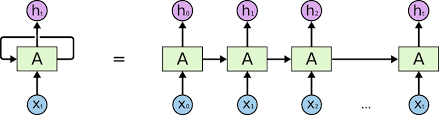

# Other types of RNN

## LSTM

There are many recurrent blocks such as LSTM. We can say the architecture of a simple LSTM block here:

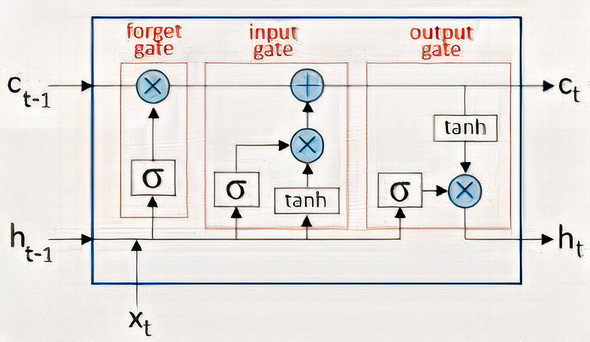

At each time step, the LSTM takes an input vector x<sub>t</sub> and combines it with the hidden state vector h<sub>t-1</sub> from the previous time step to produce a new hidden state vector h<sub>t</sub>. The output o<sub>t</sub> is then computed from the hidden state vector. The parameters of the LSTM are shared across all time steps, allowing it to handle inputs of varying lengths.

## GRU

What is GRU in RNN?
The Gated Recurrent Unit (GRU) is a type of Recurrent Neural Network (RNN) that, in certain cases, has advantages over long short term memory (LSTM). GRU uses less memory and is faster than LSTM, however, LSTM is more accurate when using datasets with longer sequences.

The architecture of GRU is shown here:

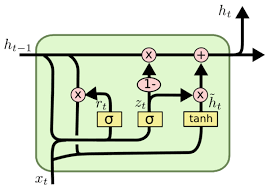

# Back Propagation through time

Recurrent Neural Networks are those networks that deal with sequential data. They predict outputs using not only the current inputs but also by taking into consideration those that occurred before it. In other words, the current output depends on current output as well as a memory element (which takes into account the past inputs).
For training such networks, we use good old backpropagation but with a slight twist. We don’t independently train the system at a specific time “t”. We train it at a specific time “t” as well as all that has happened before time “t” like t-1, t-2, t-3.

Consider the following representation of a RNN:

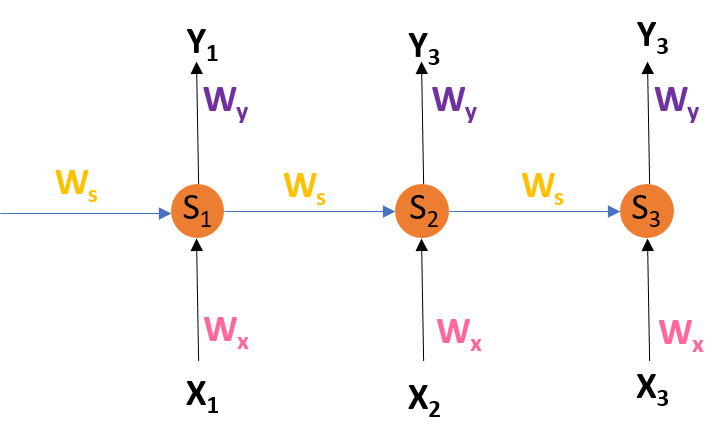

S1, S2, S3 are the hidden states or memory units at time t1, t2, t3 respectively, and Ws is the weight matrix associated with it.
X1, X2, X3 are the inputs at time t1, t2, t3 respectively, and Wx is the weight matrix associated with it.
Y1, Y2, Y3 are the outputs at time t1, t2, t3 respectively, and Wy is the weight matrix associated with it.
g1 and g2 are activation functions.
For any time, t, we have the following two equations:

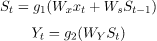

Let us now perform back propagation at time t = 3.
Let the error function be:

image.png

## Updating W<sub>y</sub>

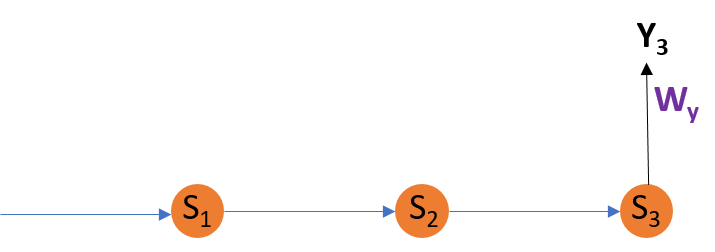

We backpropagate to update W<sub>y</sub> with the following formula:

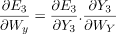

Explanation:

E<sub>3</sub> is a function of Y<sub>3</sub>. Hence, we differentiate E<sub>3</sub> w.r.t Y<sub>3</sub>.

Y<sub>3</sub> is a function of W<sub>y</sub>. Hence, we differentiate Y<sub>3</sub> w.r.t W<sub>y</sub>.

## Updating W<sub>s</sub>

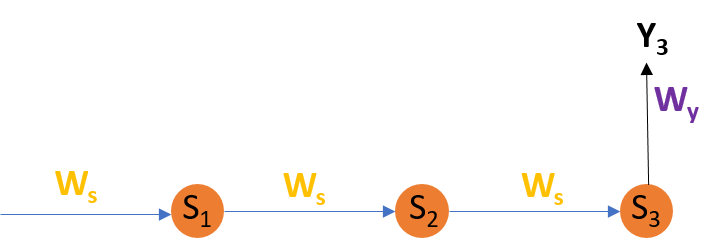

we calculate the gradient of W<sub>s</sub> with regard to all of the weights through time until t=3. So:

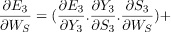

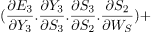

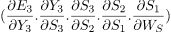

Explanation:

E<sub>3</sub> is a function of Y<sub>3</sub>. Hence, we differentiate E<sub>3</sub> w.r.t Y<sub>3</sub>.

Y<sub>3</sub> is a function of S<sub>3</sub>. Hence, we differentiate Y<sub>3</sub> w.r.t S<sub>3</sub>.

S<sub>3</sub> is a function of W<sub>s</sub>. Hence, we differentiate S<sub>3</sub> w.r.t W<sub>s</sub>.

But we can’t stop with this; we also have to take into consideration, the previous time steps. So, we differentiate (partially) the Error function with respect to memory units S<sub>2</sub> as well as S1 taking into consideration the weight matrix W<sub>s</sub>.
We have to keep in mind that a memory unit, say S<sub>t</sub> is a function of its previous memory unit S<sub>t-1</sub>.
Hence, we differentiate S3 with S2 and S2 with S1.

Generally, we can express this formula as:

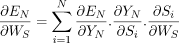

## Updating W<sub>x</sub>

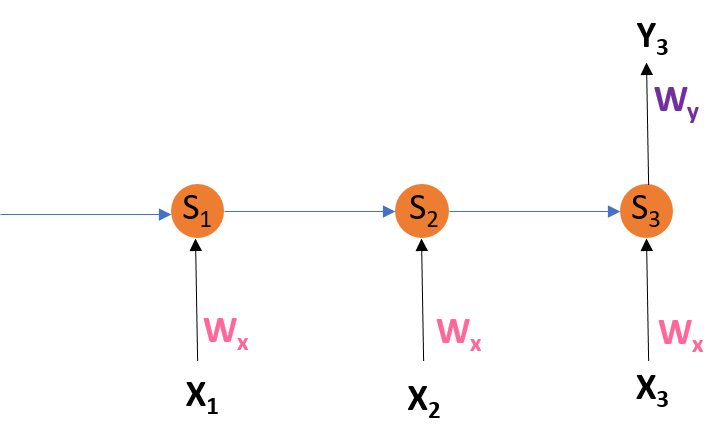

Formula:

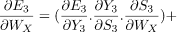

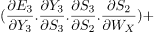

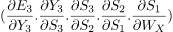

Explanation:

E<sub>3</sub> is a function of Y<sub>3</sub>. Hence, we differentiate E<sub>3</sub> w.r.t Y<sub>3</sub>.

Y<sub>3</sub> is a function of S<sub>3</sub>. Hence, we differentiate Y<sub>3</sub> w.r.t S<sub>3</sub>.

S<sub>3</sub> is a function of W<sub>x</sub>. Hence, we differentiate S<sub>3</sub> w.r.t W<sub>x</sub>.

Again we can’t stop with this; we also have to take into consideration, the previous time steps. So, we differentiate (partially) the Error function with respect to memory units S2 as well as S1 taking into consideration the weight matrix W<sub>x</sub>.

Generally, we can express this formula as:

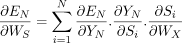

## Issues

This method of Back Propagation through time (BPTT) can be used up to a limited number of time steps like 8 or 10. If we back propagate further, the gradient $\delta$ becomes too small. This problem is called the “Vanishing gradient” problem. The problem is that the contribution of information decays geometrically over time. So, if the number of time steps is >10 (Let’s say), that information will effectively be discarded.

One of the famous solutions to this problem is by using what is called Long Short-Term Memory (LSTM) cells instead of the traditional RNN cells. But there might arise yet another problem here, called the exploding gradient problem, where the gradient grows uncontrollably large.

So what can we do about that? 

A popular method called gradient clipping can be used where in each time step, we can check if the gradient $\delta$ > threshold. If yes, then normalize it.

# Implementing in Pytorch

Now let's see how we can implement 3 types of RNN in PyTorch. We'll start by LSTM.

## Download Dataset

Firstly, we download a timeseries dataset. Here we use dataset for number of passengers on an airline. Although it is a small and simple dataset, we use it for learning purposes.

In [ ]:
#!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-04-18 11:24:07--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-04-18 11:24:07 (36.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Data Plot

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')
training_set.shape

(144, 2)

In [ ]:
training_set.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We dont want the dates so we remove them.

In [ ]:
training_set.iloc[:,1:2]

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


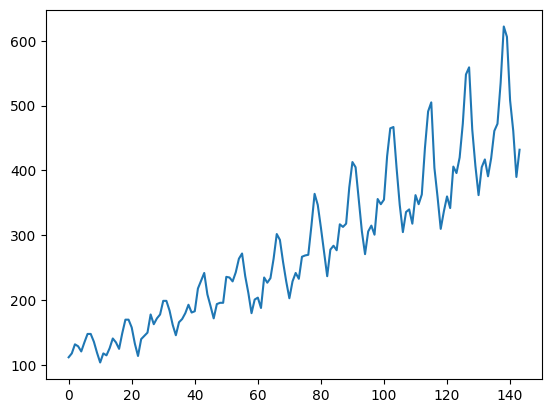

In [ ]:
training_set = training_set.iloc[:,1:2].values

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(training_set, label = 'Airline Passangers Data')
plt.show()

## Dataloading

Here, we define a function to split the dataset into time-serie windows of length `seq_length`. Meaning that the i<sub>th</sub> element of x is a tensor of length `seq_length` that shows the target column in the interval `[i, i+seq_length-1]`. And the label is equal to the next timestep which is `seq_length`.

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    n = len(data)

    for i in range(n - seq_length - 1):
        start_x = i
        end_x = i + seq_length

        x_i = data[start_x:end_x]
        y_i = data[end_x]
        
        x.append(x_i)
        y.append(y_i)

    return np.array(x), np.array(y)

Then we nomralize dataset so that it would be in range [0,1].

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_data = scaler.fit_transform(training_set)

In [ ]:
seq_length = 4
x, y = sliding_windows(training_data, seq_length)

In [ ]:
x[0]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255]])

Split test-train set:

In [ ]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # init hidden state
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # init cell state
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

Init the variables needed for training.

In [ ]:
num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

Init model

In [ ]:
model = LSTM(num_classes, input_size, hidden_size, num_layers)

define loss function and optimizer

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train the model

In [ ]:
train_losses = []
model.train()

for epoch in range(num_epochs):
    outputs = model(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    train_losses.append(loss.item())
    
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, {loss.item()}")

Epoch: 0, 0.6578255295753479
Epoch: 100, 0.014887369237840176
Epoch: 200, 0.010555111803114414
Epoch: 300, 0.0050033763982355595
Epoch: 400, 0.0030459200497716665
Epoch: 500, 0.0028110509738326073
Epoch: 600, 0.002621398074552417
Epoch: 700, 0.002457499271258712
Epoch: 800, 0.002317240694537759
Epoch: 900, 0.002198742236942053


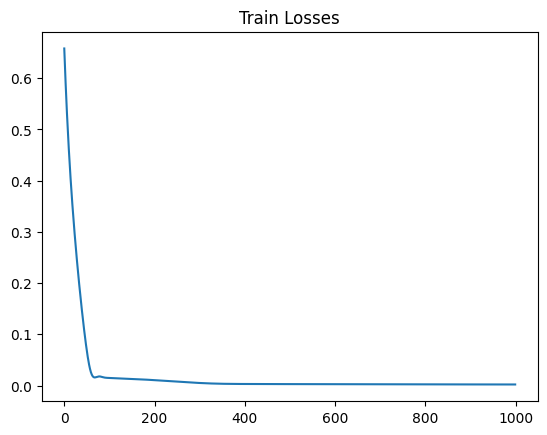

In [ ]:
plt.title("Train Losses")
plt.plot(train_losses)
plt.show()

## Testing for Airplane Passengers Dataset

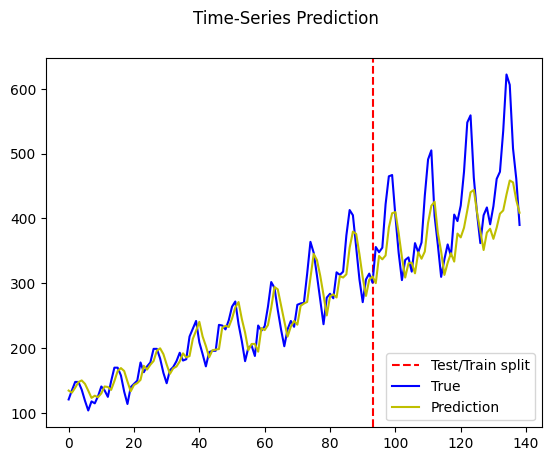

In [ ]:
model.eval()
train_predict = model(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, color='b')
plt.plot(data_predict, color='y')
plt.legend(["Test/Train split", "True", "Prediction"], loc ="lower right")

plt.suptitle('Time-Series Prediction')
plt.show()

# Alternative models: simple RNN

Instead of LSTM in our LSTM class, we can use simple RNN or GRU block:

In [ ]:
class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through RNN
        ula, h_out = self.rnn(x, h_0)

        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
model = RNN(num_classes, input_size, hidden_size, num_layers)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
train_losses = []
model.train()

for epoch in range(num_epochs):
    outputs = model(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    train_losses.append(loss.item())
    
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, {loss.item()}")

Epoch: 0, 0.21138572692871094
Epoch: 100, 0.009810179471969604
Epoch: 200, 0.0027966599445790052
Epoch: 300, 0.0023493317421525717
Epoch: 400, 0.0021170424297451973
Epoch: 500, 0.0020042527467012405
Epoch: 600, 0.0019361759768798947
Epoch: 700, 0.0018845399608835578
Epoch: 800, 0.0018474081298336387
Epoch: 900, 0.0018271522130817175


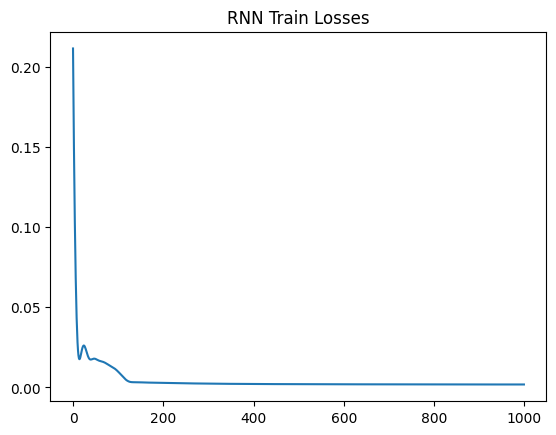

In [ ]:
plt.title("RNN Train Losses")
plt.plot(train_losses)
plt.show()

# Alternative models: GRU

In [ ]:
class GRU(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through GRU
        ula, h_out = self.gru(x, h_0)

        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
model = GRU(num_classes, input_size, hidden_size, num_layers)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
train_losses = []
model.train()

for epoch in range(num_epochs):
    outputs = model(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    train_losses.append(loss.item())
    
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, {loss.item()}")

Epoch: 0, 0.3674144148826599
Epoch: 100, 0.0074386922642588615
Epoch: 200, 0.003244135295972228
Epoch: 300, 0.0029646488837897778
Epoch: 400, 0.002733838278800249
Epoch: 500, 0.002519385190680623
Epoch: 600, 0.0023391328286379576
Epoch: 700, 0.0021935098338872194
Epoch: 800, 0.002077604876831174
Epoch: 900, 0.001986352726817131


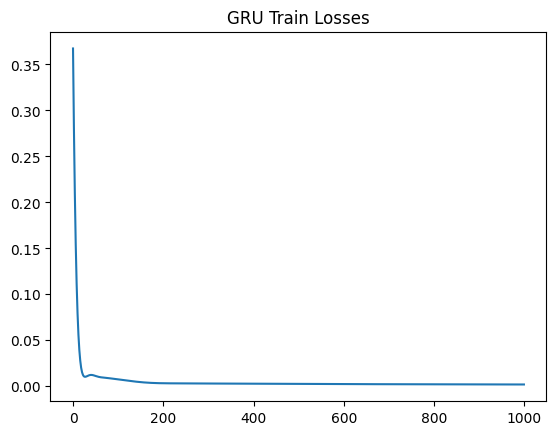

In [ ]:
plt.title("GRU Train Losses")
plt.plot(train_losses)
plt.show()

# Bidirectional RNNs

So far, with basic RNNs, we were able to predict the future. Let's say we have a sentence and we want to predict the next word:

I am ___ .

But what if we want to predict a word in the middle of a sentence? For that we have to take into account the previous and next words. For instance:

I am ___ , I haven't eaten in hours.

To complete this sentence, we have to process the future(next words), as well as the past(previous words). So if we only process the past, there might be a lot of possibilities and we don't know which one is correct. However, with combining the future data, we can see that the correct answer is most likely "hungry".

Hence, to enable straight and reverse traversal of input, Bidirectional RNNs, or BRNNs, are used. A BRNN is a combination of two RNNs - one RNN moves forward, beginning from the start of the data sequence, and the other, moves backward, beginning from the end of the data sequence. Then, we use both RNNs to predict the output. 

The network blocks in a BRNN can either be simple RNNs, GRUs, or LSTMs.

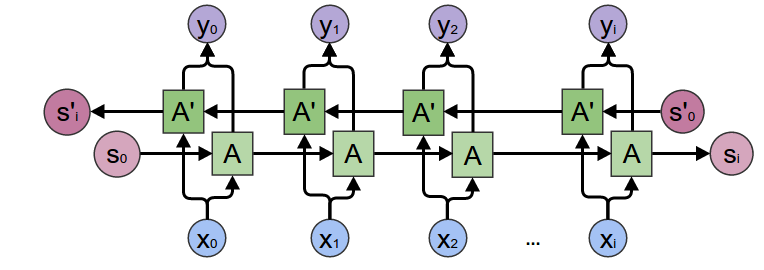

A simple implemetation can be found here:

In [3]:
class BiRNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.forward_rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
    self.backward_rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
    self.num_hiddens *= 2  # The output dimension will be doubled

  def forward(self, inputs, Hs=None):
    forward_H, backward_H = Hs if Hs is not None else (None, None)

    forward_outputs, forward_H = self.forward_rnn(inputs, forward_H)
    backward_outputs, backward_H = self.backward_rnn(reversed(inputs), backward_H)

    outputs = [torch.cat((forward, backward), -1) for forward, backward in zip(forward_outputs, reversed(backward_outputs))]
    
    return outputs, (forward_H, backward_H)